In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from VisionTransformer import VisionTransformer

from tqdm import tqdm, trange
from torch.optim import Adam, lr_scheduler
from torch.nn import CrossEntropyLoss



/home/peter/anaconda3/envs/VisionTransformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class OneHotTransform:
    def __call__(self, target):
        one_hot_target = torch.zeros(10)
        one_hot_target[target] = 1
        return one_hot_target


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.5], std= [0.5])]),
    target_transform= OneHotTransform()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.5], std= [0.5])]),
    target_transform= OneHotTransform()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

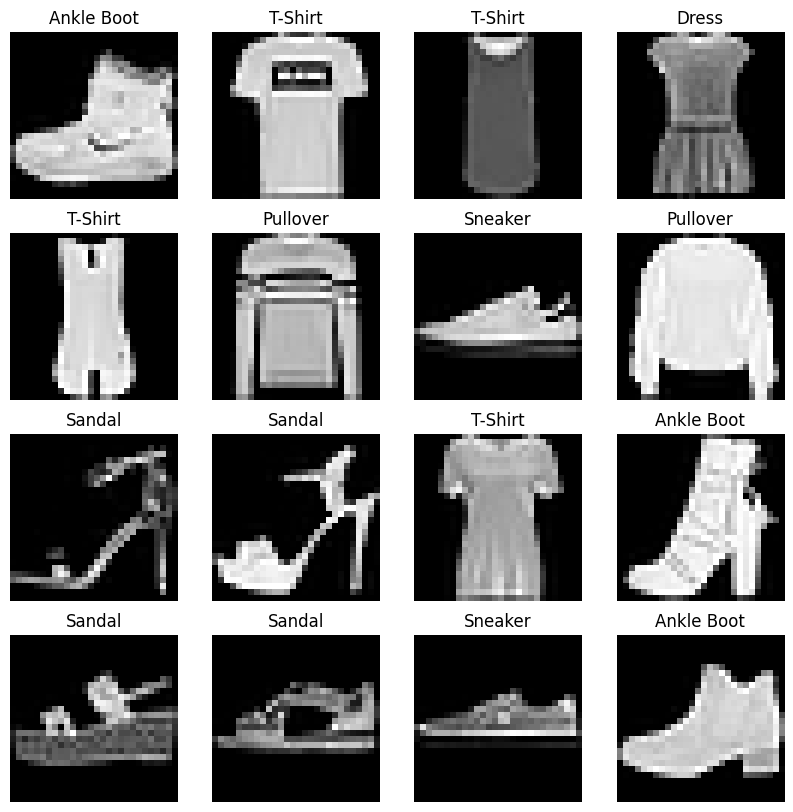

In [3]:
figure = plt.figure(figsize=(10,10))

for i in range(16):

    x = training_data.__getitem__(i)
    x[0].shape
    figure.add_subplot(4,4,i+1)

    plt.title(labels_map[torch.argmax(x[1]).item()])
    plt.axis("off")
    plt.imshow(x[0].squeeze(), cmap="gray")

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VisionTransformer(
    dimensions= (1,28,28), 
    num_patches=7, 
    embedding_size=60,              #
    num_attention_heads=10,
    num_attention_layers=6,
    lin_hidden_size=60,
    num_classes=10
)

train_loader = DataLoader(training_data, shuffle= True, batch_size= 64, num_workers=2)
test_loader  = DataLoader(test_data, shuffle= True, batch_size= 64, num_workers= 2)


# Training function
def train(
        model,
        num_epochs,
        optimizer,
        criterion,
        lr_scheduler,
):
    
    for epoch in trange(num_epochs, desc="Training"):
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1} in training", leave=False):
            x, y = batch
            x, y = x.to(device), y.to(device)
            y_hat = model(x)
            loss = criterion(y_hat, y)

            train_loss += loss.detach().cpu().item() / len(train_loader)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        lr_scheduler.step(train_loss)

        print(f"Epoch {epoch + 1}/{num_epochs} loss: {train_loss:.2f}")
    



In [5]:
num_epochs     = 20
learning_rate  = 0.001
optimizer      = Adam(model.parameters(), lr=learning_rate)
criterion      = CrossEntropyLoss()
scheduler      = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1, verbose=True)

train(
    model         = model,
    num_epochs    = num_epochs,
    optimizer     = optimizer,
    criterion     = criterion,
    lr_scheduler  = scheduler,
)

Training:   5%|▌         | 1/20 [01:20<25:21, 80.06s/it]

Epoch 1/20 loss: 1.77


Training:  10%|█         | 2/20 [02:39<23:55, 79.78s/it]

Epoch 2/20 loss: 1.66


Training:  15%|█▌        | 3/20 [03:59<22:38, 79.94s/it]

Epoch 3/20 loss: 1.65


Training:  20%|██        | 4/20 [05:19<21:16, 79.80s/it]

Epoch 4/20 loss: 1.65


Training:  25%|██▌       | 5/20 [06:39<19:59, 79.93s/it]

Epoch 5/20 loss: 1.64


Training:  30%|███       | 6/20 [07:59<18:40, 80.01s/it]

Epoch 6/20 loss: 1.64


Training:  35%|███▌      | 7/20 [09:19<17:21, 80.08s/it]

Epoch 7/20 loss: 1.64


Training:  40%|████      | 8/20 [10:41<16:05, 80.45s/it]

Epoch 8/20 loss: 1.63


Training:  45%|████▌     | 9/20 [12:00<14:41, 80.14s/it]

Epoch 9/20 loss: 1.63


Training:  50%|█████     | 10/20 [13:20<13:20, 80.04s/it]

Epoch 10/20 loss: 1.63


Training:  55%|█████▌    | 11/20 [14:40<12:01, 80.14s/it]

Epoch 11/20 loss: 1.63


Training:  60%|██████    | 12/20 [15:58<10:34, 79.29s/it]

Epoch 12/20 loss: 1.63


Training:  65%|██████▌   | 13/20 [17:11<09:02, 77.52s/it]

Epoch 00013: reducing learning rate of group 0 to 1.0000e-04.
Epoch 13/20 loss: 1.63


Training:  70%|███████   | 14/20 [18:18<07:26, 74.45s/it]

Epoch 14/20 loss: 1.61


Training:  75%|███████▌  | 15/20 [19:24<05:59, 71.84s/it]

Epoch 15/20 loss: 1.60


Training:  80%|████████  | 16/20 [20:32<04:41, 70.48s/it]

Epoch 16/20 loss: 1.59


Training:  85%|████████▌ | 17/20 [21:38<03:27, 69.33s/it]

Epoch 17/20 loss: 1.59


Training:  90%|█████████ | 18/20 [22:46<02:17, 68.92s/it]

Epoch 18/20 loss: 1.59


Training:  95%|█████████▌| 19/20 [23:53<01:08, 68.37s/it]

Epoch 19/20 loss: 1.58


Training: 100%|██████████| 20/20 [24:59<00:00, 74.96s/it]

Epoch 20/20 loss: 1.58


In [6]:
# Test loop
with torch.no_grad():
    correct, total = 0, 0
    test_loss = 0.0
    for batch in tqdm(test_loader, desc="Testing"):
        x, y = batch
        x, y = x.to(device), y.to(device)
        y_hat = model(x)
        loss = criterion(y_hat, y)
        test_loss += loss.detach().cpu().item() / len(test_loader)

        correct += torch.sum(torch.argmax(y_hat, dim=1) == torch.argmax(y, dim=1)).detach().cpu().item()
        total += len(x)
    print(f"Test loss: {test_loss:.2f}")
    print(f"Test accuracy: {correct / total * 100:.2f}%")

Testing: 100%|██████████| 157/157 [00:05<00:00, 28.49it/s]

Test loss: 1.60
Test accuracy: 85.89%
